<a href="https://colab.research.google.com/github/Dinomain/Dinomain/blob/main/GoalZone%20Fitness%20Class%20Analysis%20and%20Attendance%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GoalZone Fitness Class Analysis and Attendance Prediction**



**Background**

GoalZone is a fitness club chain in Canada.

GoalZone offers a range of fitness classes in two capacities - 25 and 15.

Some classes are always fully booked. Fully booked classes often have a low attendance rate.

GoalZone wants to increase the number of spaces available for classes.

They want to do this by predicting whether the member will attend the class or not.

If they can predict a member will not attend the class, they can make another space
available.

Read the CSV file into a Pandas DataFrame

In [269]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Read the csv file

df = pd.read_csv("https://s3.amazonaws.com/talent-assets.datacamp.com/fitness_class_2212.csv")
pd.set_option("max_rows", None)


df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


# **Data Validation and Cleaning**

In [242]:
#Rows with missing values in our data
df_missing = df[df.isnull().any(axis=1)]

df_missing.shape

df_missing

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
114,115,14,NaN,10,Fri,AM,HIIT,0
211,212,16,NaN,10,Fri,AM,Cycling,0
315,316,5,NaN,14,Sun,AM,HIIT,0
366,367,4,NaN,2,Mon,AM,Aqua,0
482,483,14,NaN,1,Mon,PM,Aqua,0
552,553,11,NaN,9,Thu,AM,HIIT,0
655,656,5,NaN,12,Sat,AM,Strength,0
734,735,7,NaN,8,Thu,AM,HIIT,0
742,743,11,NaN,10,Wed,PM,HIIT,0
781,782,10,NaN,5,Tue,PM,HIIT,0


As shown above, we only have missing values in the weight column of the DataFrame. 

In [243]:
#Replace missing values with the mean of the weight column
df["weight"].fillna(df["weight"].mean(), inplace=True)

#Confirm for missing data
df[df.isnull().any(axis=1)]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1500 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [244]:
#Checking for Data Types
df.dtypes


#Remove strings from the days_before column and convert to int dtype
df["days_before"] = df["days_before"].str.replace(" days", "").astype("int")

#Confirm for unique values in the days_before column
df["days_before"].value_counts()

df.dtypes


booking_id            int64
months_as_member      int64
weight              float64
days_before           int64
day_of_week          object
time                 object
category             object
attended              int64
dtype: object

In [245]:
#round the weight column to two decimal places
df['weight'] = df.weight.round(2)

df.head()


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [246]:
#confirm if the DataFrame columns meet the minimum threshold
df.nsmallest(n=10, columns=["months_as_member"])
df.nsmallest(n=10, columns=["weight"])
df.nsmallest(n=10, columns=["days_before"])





,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
116,117,10,97.13,1,Mon,PM,HIIT,0
313,314,23,94.94,1,Mon,PM,Cycling,1
348,349,38,72.88,1,Mon,PM,HIIT,0
443,444,16,74.09,1,Mon,PM,Cycling,1
447,448,36,77.60,1,Mon,PM,Cycling,1
482,483,14,82.61,1,Mon,PM,Aqua,0
1140,1141,9,75.12,1,Mon,PM,HIIT,0
1190,1191,30,69.49,1,Mon,PM,HIIT,1
1198,1199,6,94.48,1,Mon,PM,HIIT,1
1399,1400,7,71.88,1,Mon,PM,HIIT,0


In [247]:
#Check for unique values in the day_of_week column
df.day_of_week.value_counts()

#Replace the incorrect Strings with the correct one
day_map = {"Monday":"Mon", "Friday":"Fri", "Fri.":"Fri", "Wednesday":"Wed"}

df["day_of_week"] = df["day_of_week"].replace(day_map)

df.day_of_week.value_counts()



Fri    305
Thu    241
Mon    228
Sun    213
Sat    202
Tue    195
Wed    116
Name: day_of_week, dtype: int64

In [248]:
#Check for unique values in the category column
df.category.value_counts()

#Replace the incorrect Strings with the correct one
df["category"] = df["category"].replace("-", "unknown")

df.category.value_counts()



HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
unknown      13
Name: category, dtype: int64

# **Data Validation Process**


**months_as_member:**

The data type matches the one in the description (int64)

There are no missing values in this category. 

**weight:**

The data type matches the one in the description (float64)

There are 20 missing values in this column

**days_before:**

The days_before column was an object data type, it was converted to an integer to match the description in the instructions.

There are no missing values in this column. However, there were some data entry errors, which was rectified by using the replace method. 

```
df["days_before"] = df["days_before"].str.replace(" days", "").astype("int")

```
We also used the astype method to convert the values to integers.

**day_of_week:**

The data type matches the one in the description (object).

The data entry errors were also corrected using the replace method.

There are no missing values in this dataset. 

```
day_map = {"Monday":"Mon", "Friday":"Fri", "Fri.":"Fri", "Wednesday":"Wed"}

df["day_of_week"] = df["day_of_week"].replace(day_map)
```

**time:**

The data type matches the one in the description (object)

There are no missing values in this category. 

**category:**

The data type matches the one in the description (object)

There are technically no missing values in this category. Upon further
inspection of the strings in this column, there were 13 rows with hypen(-) as values. 

The values in these rows were replaced with the "unknown" string as stated in the instruction. 



```
df["category"] = df["category"].replace("-", "unknown")

```

**attended:**

The data type matches the one in the description (object)

There are no missing values in this category. 












In [249]:
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0




```
# This is formatted as code
```

# **Exploratory Data Analysis**

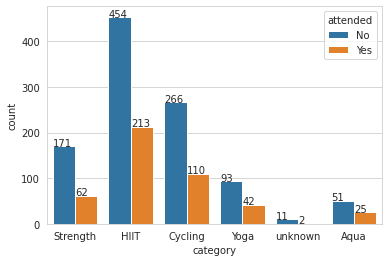

In [250]:
hue_map = {1:"Yes", 0:"No"}

ax = sns.countplot(data=df, x=df["category"], hue=df["attended"].replace(hue_map))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))

plt.show()




*   As shown in the visualization above, the HIIT category has the highest number of observations. 
*   A high percentage of members seem to be ghosting the fitness classes





# **Attendance Rate Across Each Category**

In [251]:
#Visualize attendance rates across each category
df1= df.copy(deep=True)

df1["attended"] = df["attended"].replace({1:"Yes", 0:"No"})

df1_strength = df1[df1.category == "Strength"]

df1_hiit = df1[df1.category == "HIIT"]

df1_cycling = df1[df1.category == "Cycling"]

df1_yoga = df1[df1.category == "Yoga"]

df1_unknown = df1[df1.category == "unknown"]

df1_aqua = df1[df1.category == "Aqua"]

df1.tail()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
1495,1496,21,79.51,10,Fri,AM,HIIT,No
1496,1497,29,89.55,2,Mon,AM,Strength,No
1497,1498,9,87.38,4,Tue,AM,HIIT,No
1498,1499,34,68.64,14,Sun,AM,Aqua,No
1499,1500,20,94.39,8,Thu,AM,Cycling,Yes


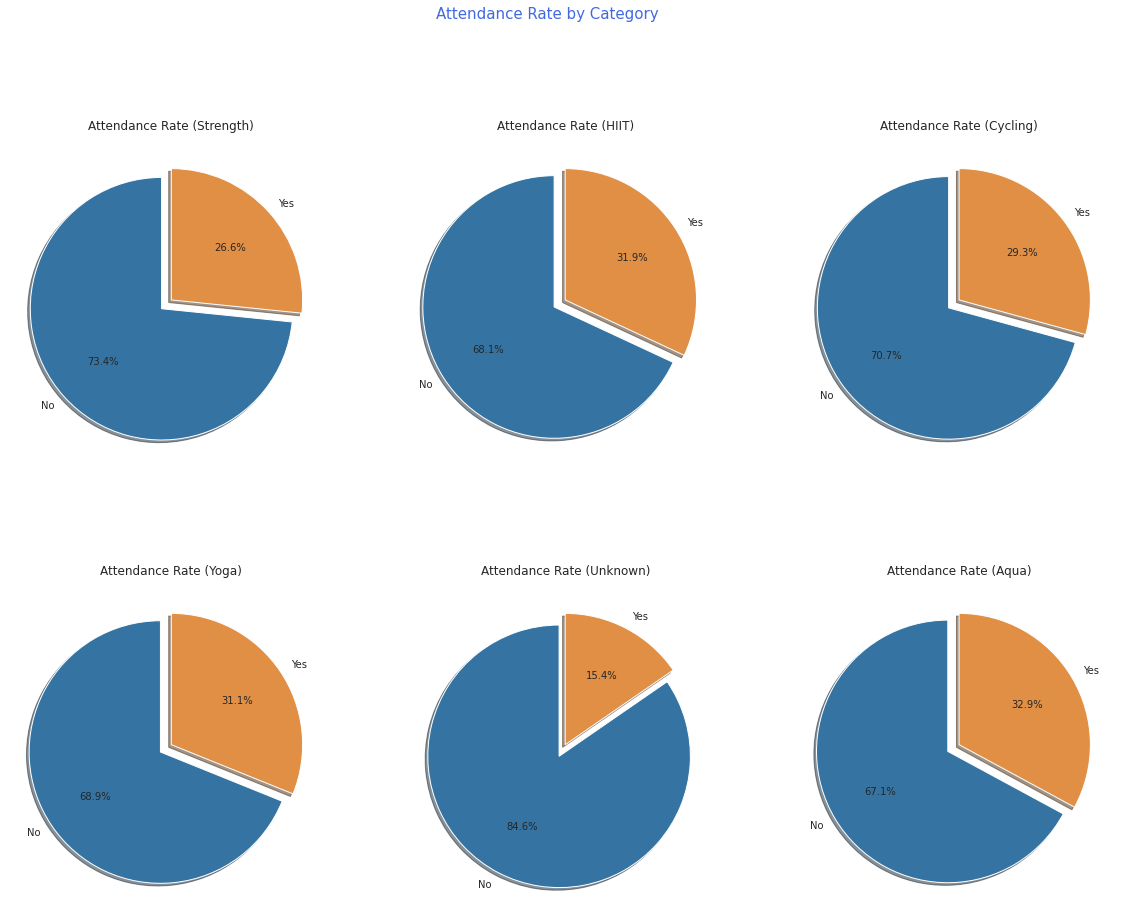

In [252]:
fig, axs = plt.subplots(2,3, sharex=True, sharey=True, figsize=(20,15))
fig.suptitle('Attendance Rate by Category', fontsize=15, color="#4169e1")

sizes = [len(df1_strength[df1_strength.attended == "No"]), len(df1_strength[df1_strength.attended == "Yes"])]
labels = "No", "Yes"
explode = (0.1, 0)
color = ["#3574A2","#E08F45"]

axs[0,0].pie(sizes, labels=labels, explode=explode, shadow = True, autopct='%1.1f%%', startangle=90,colors=color)
axs[0,0].set_title("Attendance Rate (Strength)")

sizes_2 = [len(df1_hiit[df1_hiit.attended == "No"]), len(df1_hiit[df1_hiit.attended == "Yes"])]
axs[0,1].pie(sizes_2, labels=labels, explode=explode, shadow = True, autopct='%1.1f%%', startangle=90,colors=color)
axs[0,1].set_title("Attendance Rate (HIIT)")

sizes_3 = [len(df1_cycling[df1_cycling.attended == "No"]), len(df1_cycling[df1_cycling.attended == "Yes"])]
axs[0,2].pie(sizes_3, labels=labels, explode=explode, shadow = True, autopct='%1.1f%%', startangle=90,colors=color)
axs[0,2].set_title("Attendance Rate (Cycling)")

sizes_4 = [len(df1_yoga[df1_yoga.attended == "No"]), len(df1_yoga[df1_yoga.attended == "Yes"])]
axs[1,0].pie(sizes_4, labels=labels, explode=explode, shadow = True, autopct='%1.1f%%', startangle=90,colors=color)
axs[1,0].set_title("Attendance Rate (Yoga)")

sizes_5 = [len(df1_unknown[df1_unknown.attended == "No"]), len(df1_unknown[df1_unknown.attended == "Yes"])]
axs[1,1].pie(sizes_5, labels=labels, explode=explode, shadow = True, autopct='%1.1f%%', startangle=90,colors=color)
axs[1,1].set_title("Attendance Rate (Unknown)")

sizes_6 = [len(df1_aqua[df1_aqua.attended == "No"]), len(df1_aqua[df1_aqua.attended == "Yes"])]
axs[1,2].pie(sizes_6, labels=labels, explode=explode, shadow = True, autopct='%1.1f%%', startangle=90,colors=color)
axs[1,2].set_title("Attendance Rate (Aqua)")

plt.show()



*   As shown in the visualization above, the Strength category has the lowest attendance rate of about 27 percent.
*   The Aqua category has the highest attendance rate of about 33 percent. 

*  The attendance rate accross the categories are close but not balanced. 






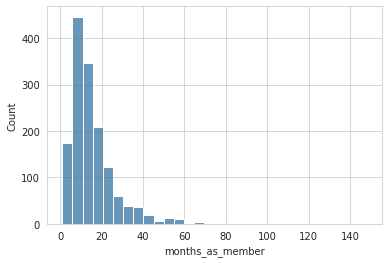

In [253]:
# Visualizing the Distribution of number of months as a member

sns.histplot(df['months_as_member'], bins=30, color="#3574A2")

plt.show()




*   The distribution of the of this column is right skewed.
*   Members with less than 20 months make up the majority population of the fitness classes




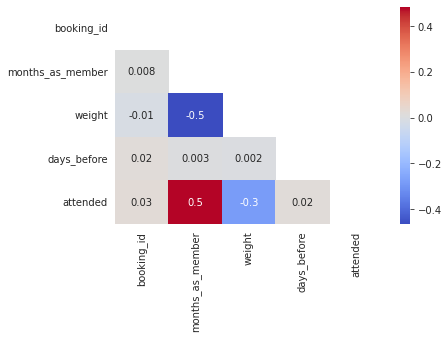

In [254]:
#Relationship between attendance and months_as_member
sns.heatmap(df.corr(), mask=np.triu(df.corr()), annot=True, fmt='.1g', cmap= 'coolwarm')
plt.show()



*  The correlation matrix above shows there is a moderately positive linear relationship between attendance and number of months as a member. 

* Perhaps, we could gain further insights by visualizing the two features on a boxplot.


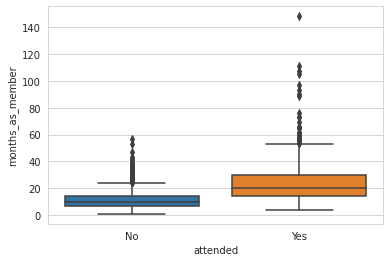

In [255]:
#Visualizing

sns.set_style("whitegrid")

sns.boxplot(data=df1, x="attended", y="months_as_member")

plt.show()




*   75% of the people who attended the fitness classes have been members for over 30 months.
*   The median membership time for people who attended the fitness classes is 20 months. 


*   75% of the people who did not attend the fitness classes have been members for less than 20 months.
*   The median membership time for people who did not attend the fitness classes is about 10 months. 

People who attended the fitness classes have been members for a longer time on average compared to people who did not attend the fitness classes.





# **Model Fitting**



The instruction asked us to predict whether members will attend or not. This is a **classification** problem.

The K-Nearest Neigbour classification model is my choice for the foundation model because it is straightforward to comprehend and utilize. Additionally, it performs well when the datapoints are clearly defined, as they are in this dataset.

As the second model, I've chosen the logistics regression model because it is simple to understand, train, and utilize.

In [256]:
from sklearn import preprocessing

df_model = df.drop(columns="booking_id")

X = pd.get_dummies(df_model.drop(columns="attended"))

y = df_model["attended"]

X.head()

,months_as_member,weight,days_before,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,time_AM,time_PM,category_Aqua,category_Cycling,category_HIIT,category_Strength,category_Yoga,category_unknown
0,17,79.56,8,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
1,10,79.01,2,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,16,74.53,14,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3,5,86.12,10,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,15,69.29,8,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0


In [268]:
#import the models and performance metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

#KNN
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=7)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

model.score(X_test, y_test)

0.7433333333333333

In [267]:
#Logistic Regression

logreg = LogisticRegression(max_iter=400)

logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_test)

logreg.score(X_test, y_test)

0.7766666666666666

# **Model Evaluation**

For my performance assessment of the models, I used the accuracy metric because it is simple to understand and convey to a wide range of audiences.

The accuracy score for the KNN model is 74%, while the accuracy score for the Logistic Regression Model is 78%.

From this metric, it is recommended to use Logistic Regression for this project because it has higher chance of being correct.

In [265]:
#Evaluating model performance
#KNN
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.89      0.82       197
           1       0.69      0.47      0.55       103

    accuracy                           0.74       300
   macro avg       0.72      0.68      0.69       300
weighted avg       0.74      0.74      0.73       300



In [266]:
print(classification_report(y_test, y_pred_log))


              precision    recall  f1-score   support

           0       0.77      0.95      0.85       197
           1       0.82      0.45      0.58       103

    accuracy                           0.78       300
   macro avg       0.79      0.70      0.71       300
weighted avg       0.79      0.78      0.76       300

